In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
apple = yf.Ticker("AAPL")

In [3]:
apple = apple.history(period = 'max')

In [4]:
apple.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


<Axes: xlabel='Date'>

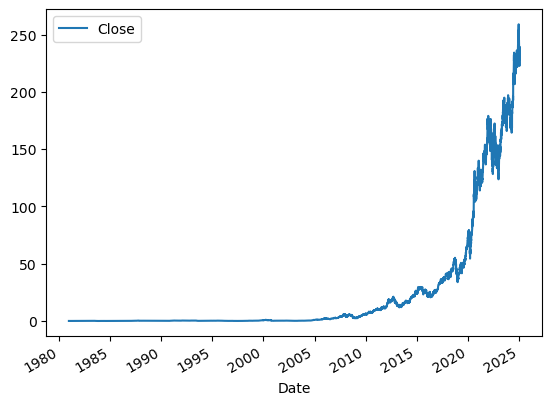

In [5]:
apple.plot.line(y="Close",use_index= True)

In [6]:
apple = apple.drop(["Dividends", "Stock Splits"], axis = 1)

**Technical Analysis**

In [7]:
# Calculating Moving averages to spot trend

apple['200-MA'] = apple['Close'].rolling(window=200).mean()
apple['400-MA'] = apple['Close'].rolling(window=400).mean()

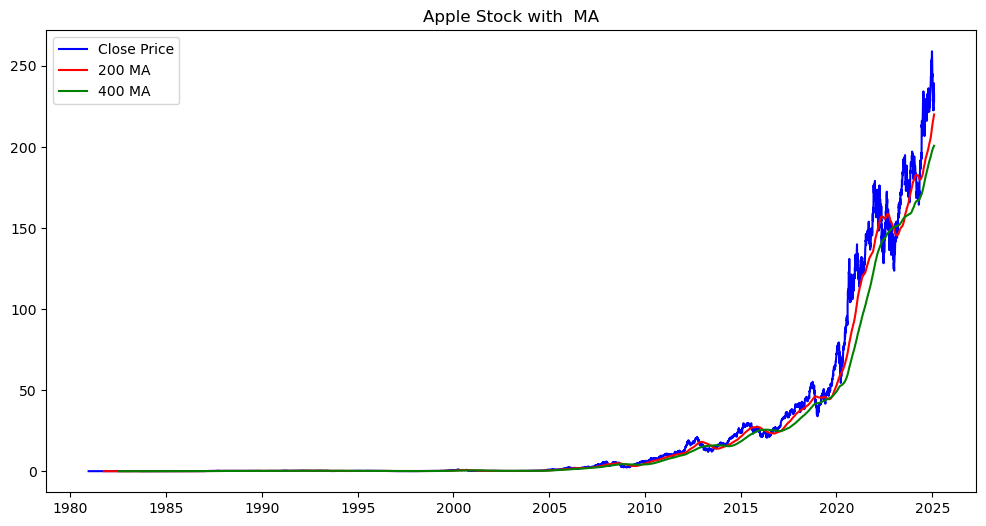

In [8]:
plt.figure(figsize=(12,6))
plt.plot(apple['Close'],label='Close Price',color = 'blue')
plt.plot(apple['200-MA'],label='200 MA',color = 'red')
plt.plot(apple['400-MA'],label='400 MA',color = 'green')
plt.legend()
plt.title('Apple Stock with  MA')
plt.show()

In [11]:
apple['20-MA'] = apple['Close'].rolling(window=20).mean()
apple['50-MA'] = apple['Close'].rolling(window=50).mean()
last_3_months = apple.loc[apple.index >= apple.index.max() - pd.DateOffset(months=3)]
last_3_months.head()

,Open,High,Low,Close,Volume,200-MA,400-MA,20-MA,50-MA
Date,,,,,,,,,
2024-11-04 00:00:00-05:00,220.747138,222.545148,219.468546,221.766006,44944500,201.817938,190.886121,230.199734,226.787688
2024-11-05 00:00:00-05:00,221.556241,223.703872,220.896963,223.204422,28111300,201.969236,191.033740,230.083861,226.713170
2024-11-06 00:00:00-05:00,222.365355,225.821559,220.946918,222.475235,54561100,202.110470,191.184170,229.743236,226.607087
2024-11-07 00:00:00-05:00,224.383137,227.629565,224.323205,227.229996,42137700,202.278861,191.344257,229.665321,226.626865
2024-11-08 00:00:00-05:00,227.169998,228.660004,226.410004,226.960007,38328800,202.447544,191.510185,229.648325,226.575316


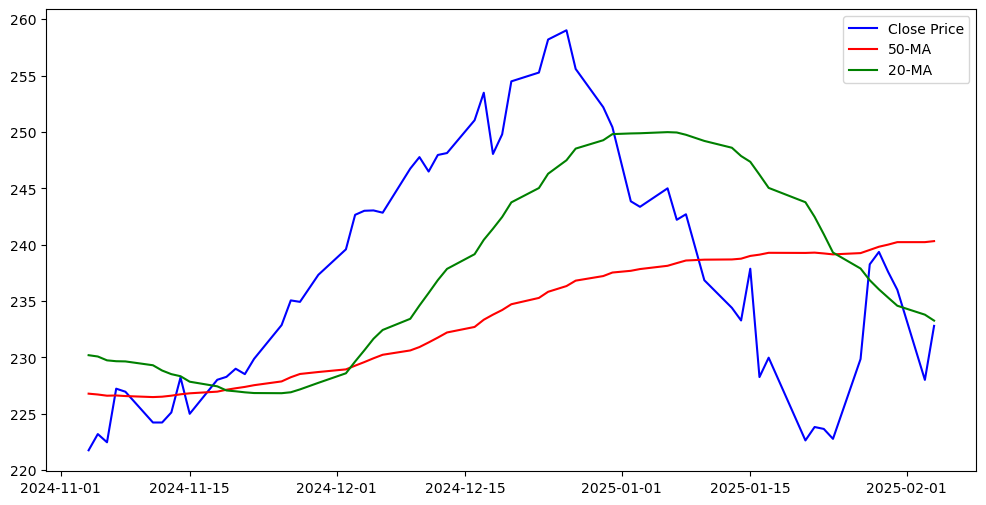

In [12]:
plt.figure(figsize=(12,6))
plt.plot(last_3_months['Close'],label='Close Price', color ='blue')
plt.plot(last_3_months['50-MA'], label = '50-MA',color='red')
plt.plot(last_3_months['20-MA'], label = '20-MA',color='green')         
plt.legend()
plt.show()         

**Comparing with Market index**

In [13]:
sp500 = yf.download("^GSPC",period = "5y")['Close']


[*********************100%***********************]  1 of 1 completed


In [15]:
last_5y = apple.loc[apple.index >= apple.index.max() - pd.DateOffset(years=5)]


In [16]:
# Normalize the closing prices to start from 100
last_5y['Normalized'] = (last_5y['Close'] / last_5y['Close'].iloc[0]) * 100
sp500['Normalized'] = (sp500 / sp500.iloc[0]) * 100


C:\Users\User\AppData\Local\Temp\ipykernel_13688\1496352334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_5y['Normalized'] = (last_5y['Close'] / last_5y['Close'].iloc[0]) * 100


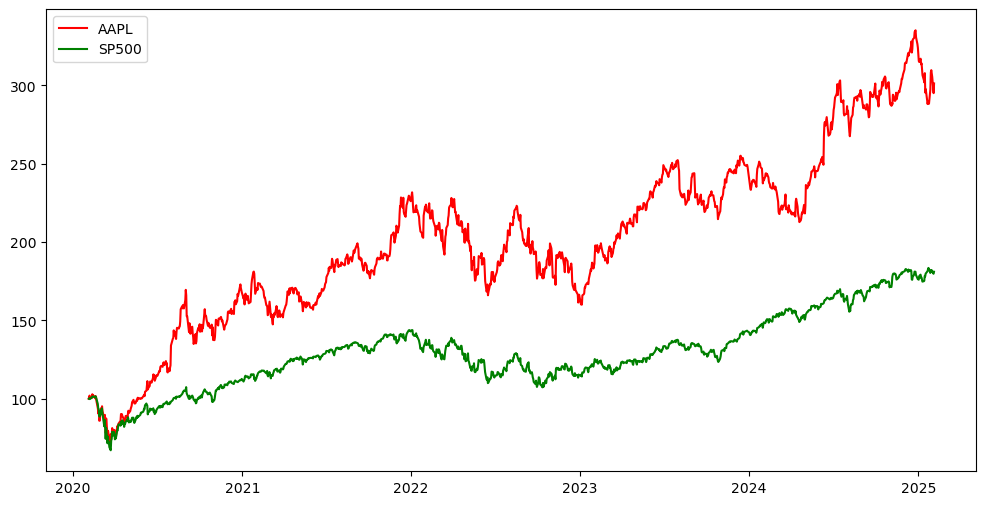

In [18]:
plt.figure(figsize=(12,6))
plt.plot(last_5y['Normalized'],label="AAPL", color="red")
plt.plot(sp500['Normalized'],label="SP500",color="green")
plt.legend()
plt.show()